In [1]:
from my_functions import *

d,dr = -1, dur_range[-1]
# d,dr = -1,180

Alpha values = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
orbits fs = 0.05 Hz, orbits t0 = 12160.0 s,  orbit_duration = 1424.0 d
Number of Verification Binaries = 16


In [2]:
# prepare arrays

# ([acc,oms],[Ngalbins],[alpha],[A,E],[N1 iterations])
amp_max_all = np.zeros((2,Ngalbins,len(alpha),2,N1))

# ([acc,oms],[alpha],[N1 iterations],[A,E],[N2 likelyhood range values])
# L_range_tot = np.zeros((2,Ngalbins,len(alpha),N1,2,N2))

In [3]:

# import the data
for ns,ns_src in enumerate([noise_source[0]]):
    print ("Importing {} data".format(ns_src))
    for b in tqdm(usebinaries):
        for ch in range(2):
            filename = ext+'measurements/'+ns_src+'/{}d/Matched_filtering_result_{}_bin{}.txt'.format(dr,rec[ch],b)
            rawdata = ascii.read(filename)

            filecontent = np.zeros((len(alpha),N1))
            for i in range(len(alpha)):
                filecontent[i] = rawdata['col'+str(i)]

                # filename2 = 'measurements/'+ns_src+'/{}d/{}/L_range_{}_bin{}.txt'.format(dr,alpha_nm[i],rec[ch],b)
                # rawdata2 = ascii.read(filename2)

                # filecontent2 = np.zeros((N1,N2))
                # for j in range(N1):
                    # filecontent2[j] = rawdata2['col'+str(j)]
                # L_range_tot[ns,int(b),i,:,ch] = filecontent2
            amp_max_all[ns,int(b),:,ch] = filecontent

Importing tm_asds data


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 337.17it/s]


In [4]:
stdv_all = np.std(amp_max_all,axis=4)
# ([acc,oms],[Ngalbins],[alpha],[A,E])


In [5]:
print (amp_max_all.shape)
print (stdv_all.shape)

(2, 16, 9, 2, 10)
(2, 16, 9, 2)


In [6]:
import matplotlib.pylab as pl

lab2 = ['acc','OMS']

sorted_galbins = np.argsort(f_true)[::-1]

def gb_influplot(a,data,N,axs,i,j,skip=1,label=False,ymin=8e-2):
    for k in sorted_galbins[::skip]:
        axs[i,j].loglog(a,data[:,k],label="{:.2f} mHz".format(f_true[k]*1e3),c=pl.cm.viridis(1-f_true[k]/f_true[0]))
        #c=times/1e9,cmap='jet'
    # Enable title to see what is plotted
    # axs[i,j].set_title(title)
    axs[i,j].axvline(1,c='black',linestyle='--',alpha=0.8)
    axs[i,j].grid()
    axs[i,j].tick_params(axis='both',which='both',top=True,right=True)
    # axs[i,j].axhline(1,c='black',linestyle='--',alpha=.5)
    if i == 1:
        if j == 0:
            axs[i,j].set_xlabel("$\\alpha_a$")
        else:
            axs[i,j].set_xlabel("$\\alpha_o$")
            axs[i,j].legend(bbox_to_anchor=(1,1),loc='center left')
        axs[i,j].set_xticks(np.logspace(-4,4,5))
        
        
    if j == 0:
        axs[i,j].set_ylabel("$\sigma_{A_i}/\sigma_{A_{i,0}}$ channel "+rec[i])
        axs[i,j].set_ylim(ymin,1.5*np.max(data))
    if label:
        axs[i,j].legend()


/tmp/ipykernel_23386/2274442069.py:4: RuntimeWarning: invalid value encountered in true_divide
  gb_influplot(alpha,stdv_all[noise_index,:,:,AE_index].T/stdv_all[noise_index,:,len(alpha)//2,AE_index],Ngalbins,axs,AE_index,noise_index)
/tmp/ipykernel_23386/2274442069.py:4: RuntimeWarning: invalid value encountered in true_divide
  gb_influplot(alpha,stdv_all[noise_index,:,:,AE_index].T/stdv_all[noise_index,:,len(alpha)//2,AE_index],Ngalbins,axs,AE_index,noise_index)


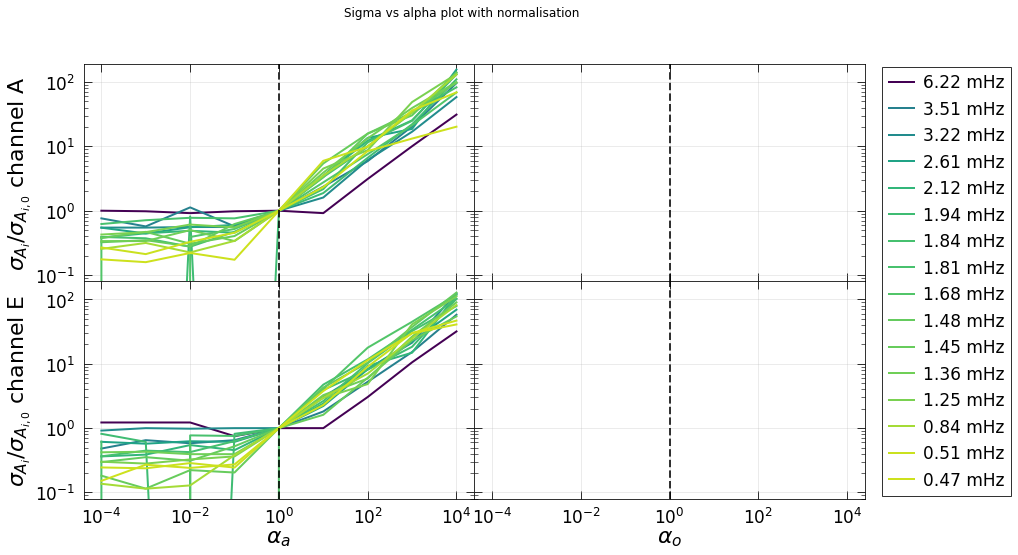

In [7]:
fig,axs = plt.subplots(2,2,figsize=(14,8),sharex=True,sharey=True,gridspec_kw={"hspace":0,"wspace":0})
for noise_index in range(2):
    for AE_index in range(2):
        gb_influplot(alpha,stdv_all[noise_index,:,:,AE_index].T/stdv_all[noise_index,:,len(alpha)//2,AE_index],Ngalbins,axs,AE_index,noise_index)
    # gb_influplot(alpha,cov_matrix_diag[i]/cov_matrix_diag[i,0],l,Ngalbins,axs,x,y)
fig.suptitle("Sigma vs alpha plot with normalisation")
plt.savefig("plots/sigma_alpha_simulated_normalised.pdf")

plt.show()

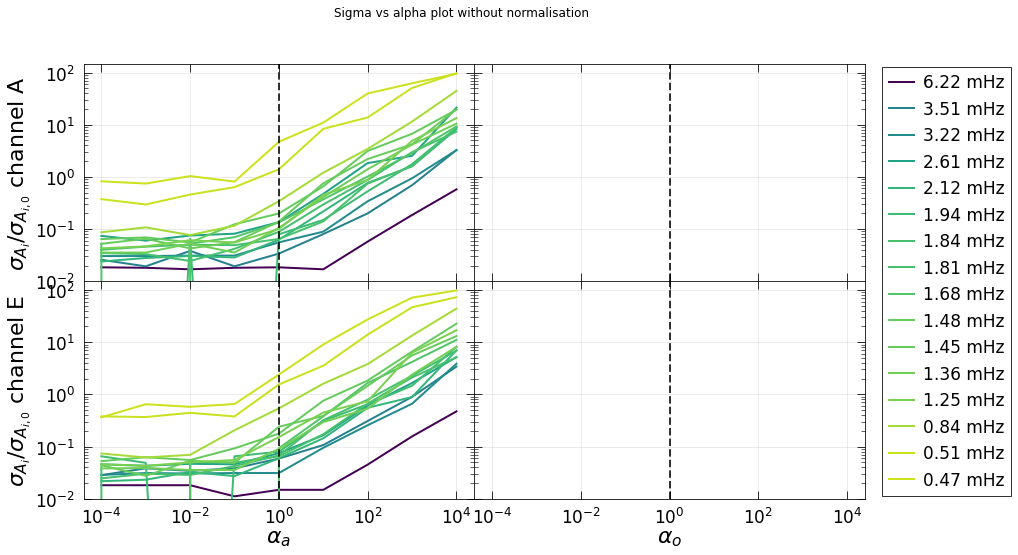

In [8]:

fig,axs = plt.subplots(2,2,figsize=(14,8),sharex=True,sharey=True,gridspec_kw={"hspace":0,"wspace":0})
for noise_index in range(2):
    for AE_index in range(2):
        gb_influplot(alpha,stdv_all[noise_index,:,:,AE_index].T,Ngalbins,axs,AE_index,noise_index,ymin=1e-2)
    # gb_influplot(alpha,cov_matrix_diag[i]/cov_matrix_diag[i,0],l,Ngalbins,axs,x,y)
fig.suptitle("Sigma vs alpha plot without normalisation")
plt.savefig("plots/sigma_alpha_simulated.pdf")
plt.show()

# The next step is to calculate where the value doubles compared to the nominal noise value $(\alpha_a = \alpha_o = 1)$

In [9]:
# Mask away all binaries that have values of 0 in their data
#arrises from finite resolution around minimum due to the way the range around the amplitude is sampled.


# bin_mask = np.ones((2,Ngalbins),dtype=bool)

# for AE in range(2):
#     for b in range(Ngalbins):
#         if np.sum(stdv_all[0,b,:,AE] < 1e-2) != 0:
#             print ("Binary {} with frequency {} mHz".format(b,f_true[b]/1e3))
#             print (stdv_all[0,b,:,AE])
#             bin_mask[AE,b] = False

bin_mask = (np.sum(stdv_all < 1e-2,axis=2) == 0) # bin_mask[noise source index, binary index, channel index]
# print (bin_mask)

In [10]:
# Use interpolate function or something...
from scipy.interpolate import interp1d

N_iters = 10001
x_testvalues = np.logspace(np.log10(alpha[0]),np.log10(alpha[-1]),N_iters)
i_increase = np.zeros((2,2,Ngalbins),dtype=int)
a_increase = np.zeros((2,2,Ngalbins))

for ns_i in range(2):
    for AE in range(2):
        for b in np.arange(Ngalbins)[bin_mask[ns_i,:,AE]]:
            # ([acc,oms],[Ngalbins],[alpha],[A,E])
            y_testvalues = np.interp(x_testvalues,alpha,stdv_all[ns_i,b,:,AE])
            
            arr = abs(y_testvalues-2*y_testvalues[N_iters//2])
            i_increase[ns_i,AE,b] = np.where(arr == np.min(arr))[0][0]
            a_increase[ns_i,AE,b] = x_testvalues[i_increase[ns_i,AE,b]]

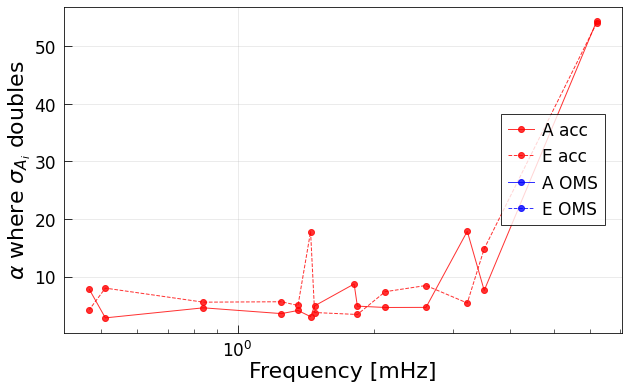

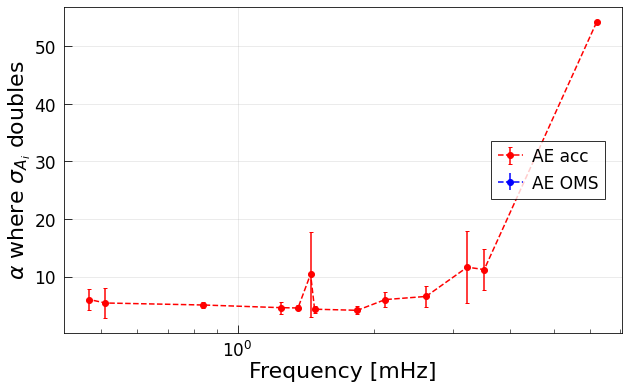

In [21]:
lab = [["A acc", "E acc"],["A OMS", "E OMS"]]
lab2 = ["AE acc","AE OMS"]
cols = ['red','blue']
lnstls = ['-','--']

def sigdouble_freq_plot():
    plt.legend(loc=5)
    plt.xlabel("Frequency [mHz]")
    plt.ylabel("$\\alpha$ where $\sigma_{A_i}$ doubles")
    # plt.title("VB's to sample acceleration and OMS noise")
    # plt.xlim(4e-1,1e1)
    plt.xscale('log')
    plt.grid()


plt.figure(figsize=(10,6))
for ns_i in range(2):
    for AE in range(2):
        srtd_gb2 = (np.argsort(f_true[bin_mask[ns_i,:,AE]])[::-1])
        plt.errorbar(f_true[bin_mask[ns_i,:,AE]][srtd_gb2]*1e3, a_increase[ns_i,AE][bin_mask[ns_i,:,AE]][srtd_gb2], label=lab[ns_i][AE],
                     c=cols[ns_i], linestyle=lnstls[AE], marker='o', alpha=.8, linewidth=1)
sigdouble_freq_plot()
plt.savefig("plots/sigdouble_freq.pdf")
plt.show()

plt.figure(figsize=(10,6))
for ns_i in range(2):
    avg = np.mean(a_increase[ns_i],axis=0)
    std = np.std(a_increase[ns_i],axis=0)
    mask2 = bin_mask[ns_i,:,0] * bin_mask[ns_i,:,1]
    srtd_gb3 = (np.argsort(f_true[mask2])[::-1])
    plt.errorbar(f_true[mask2][srtd_gb3]*1e3, avg[mask2][srtd_gb3], yerr= std[mask2][srtd_gb3], label=lab2[ns_i], c=cols[ns_i], linestyle='--', marker='o', linewidth=1.5)

sigdouble_freq_plot()
plt.savefig("plots/sigdouble_freq2.pdf")
plt.show()